# ALMA Science Archive Query Tools
### **Martina Torsello**

#### **The Birth of Solar Systems Summer School**
#### **3 March 2025**

## Query Tools Notebook

This notebook is designed to help you learn how to utilize query tools within the [ALMA Science Archive (ASA)](https://almascience.eso.org/aq/).

### How to Use
Each cell can be executed by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>, you may enter your attempts in the empty cells and create new cells by clicking the <kbd>+Code</kbd> button.

You can run it using Google Colab or Jupyter Notebook in your own python/conda environment.

**To open the notebook in Colab:**  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; https://colab.research.google.com/github/martitors/PPD_School_2025/blob/main/Query_tutorial_PPD.ipynb

**To download the notebook and work with it in your local station:** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; https://github.com/martitors/PPD_School_2025/blob/main/Query_tutorial_PPD.ipynb

## Parts Overview

In this notebook we will see three of the most popular query tools:

### [Part 1. pyVO](#pyVO)
### [Part 2. astroquery](#astroquery)
### [Part 3. ALminer](#alminer)
### [Part 4. Exercise](#workstation)

## Packages installation
### **Google Colab**
If you are using Colab, the installation of the different packages will be done through *pip*.

In [23]:
import sys
moduleList = sys.modules

if 'google.colab' in moduleList:

    ! pip install https://github.com/emerge-erc/ALminer/archive/refs/heads/main.zip

  Using cached https://github.com/emerge-erc/ALminer/archive/refs/heads/main.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://****@github.com/astropy/astroquery to /tmp/pip-install-yuwd79h0/astroquery_656114f373e84718b12a82f8711f3342
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/astropy/astroquery' /tmp/pip-install-yuwd79h0/astroquery_656114f373e84718b12a82f8711f3342
  Resolved https://****@github.com/astropy/astroquery to commit 50eadddbebbb70890087f93891d62164dc690f86
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### **Local environment**

Otherwise, if you are running this notebook on the your local machine using jupyter, you should install all the packages in advance on your own conda/pyhton environment.
After you have activate your environment, you can execute the following lines:

#### **Download scipy and ALminer** (pyVO and astroquery are automatically installed via ALminer dependencies)
**BEWARE:** You should download the 'bleeding edge' from github and not the classic *pip install alminer*.
Some functions (i.e. Splatalogue) currently only work in the development version of this packages.


` pip install scipy https://github.com/emerge-erc/ALminer/archive/refs/heads/main.zip `


# Part 1. pyVO<a name="pyVO"></a>

**pyVO** (Python Virtual Observatory) is a Python library designed to access and query astronomical data through the Virtual Observatory (VO).

* Officially supported by the ALMA archive developers.
* Offers a simple interface to query VO services and retrieve astronomical data from them.
* It facilitates tasks such as searching for specific observations, accessing metadata, and downloading data files for analysis.

## Set-up

In [25]:
import pyvo
import pandas as pd

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")

# If the ESO archive is down, you may use the NRAO/NAOJ mirrors:
# service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")
# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")

## Resources
* The language used by the IVOA to represent astronomy queries posted to VO services: [The Astronomical Data Query Language (ADQL)](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html).
* Examples on using pyVO to query the ALMA archive: [Notebooks on the ALMA Science Portal](https://almascience.eso.org/alma-data/archive/archive-notebooks).


## Query Standart Format

In [20]:
query = f"""

         """

#### Quering options:

* `SELECT`: The columns you want to retrieve from the table.

* `WHERE`: The constraints on the data you want to retrieve.

* `FROM`: Specifies the table or catalog from which you want to retrieve data.

* `INTERSECT`: The results should match both conditions specified.

* `JOIN`: Join operation between two tables.

* `ORDER BY`: The column(s) by which the results should be sorted.

* `LIMIT`: The maximum number of results to return.

* `FORMAT`: The format in which you want the results to be returned (e.g., VOTable, CSV, JSON).

## Get all available column names

In [21]:
# Query the metadata
metadata_query = """ SELECT column_name, unit, description
                     FROM TAP_SCHEMA.columns """

TAP_metadata = service.search(metadata_query)

# Convert in pandas dataframe
TAP_metadata_pd = pd.DataFrame(TAP_metadata).set_index('column_name')

print(TAP_metadata_pd.index.to_list())

['source_names', 'm_ra', 'm_ra_uncertainty', 'm_dec', 'm_dec_uncertainty', 'm_frequency', 'm_flux', 'm_flux_uncertainty', 'm_origin', 'm_degree', 'm_degree_uncertainty', 'm_angle', 'm_angle_uncertainty', 'm_date_observed', 'm_frequency_support_display', 's_ra_deg', 's_ra_deg_uncertainty', 's_dec_deg', 's_dec_deg_uncertainty', 'b_spectral_index', 'band_name', 'schema_name', 'utype', 'description', 'schema_name', 'table_name', 'table_type', 'utype', 'description', 'table_index', 'table_name', 'column_name', 'utype', 'ucd', 'unit', 'description', 'datatype', 'arraysize', 'xtype', '"size"', 'principal', 'indexed', 'std', 'column_index', 'key_id', 'from_table', 'target_table', 'utype', 'description', 'key_id', 'from_column', 'target_column', 'obs_publisher_did', 'obs_collection', 'facility_name', 'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level', 'collections', 'target_name', 's_ra', 's_dec', 's_fov', 's_region', 'schema_index', 's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel',

## Get information about a column

In [27]:
column = 'frequency'

#Print the column name
print("\033[1mColumn: \033[0m", column )

# Get the description of a given column
print("\n\033[1mDescription: \033[0m",
      TAP_metadata_pd.loc[ column , 'description'])

# Get the units of a given column
print("\n\033[1mUnits: \033[0m",
      TAP_metadata_pd.loc[ column , 'unit'])

Column:  frequency

Description:  Observed (tuned) reference frequency on the sky.

Units:  GHz


## Pandas Dataframe

PyVO provides the capability to display tables in **Pandas** format, which is particularly useful for data visualization.

### Pandas table display set-up

In [32]:
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns', None)

**BEWARE:** You can choose to display all the rows or columns using `pd.set_option(..., None)`, but this may overload your notebook and crash the kernel!

##  Query by coordinates
#### **RA** = 67.910462 , **Dec** = 18.232739, **Search radius** = 0.005 degrees:

In [33]:
query = f"""
        SELECT *
        FROM ivoa.obscore
        WHERE INTERSECTS(
                CIRCLE( 'ICRS', 67.910462, 18.232739,  0.005)
                ,s_region ) =1
        """
q_results = service.search(query).to_table().to_pandas()
q_results

,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,collections,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,pi_userid,pi_name,spectral_resolution,o_ucd,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,lastModified
0,ADS/JAO.ALMA#2011.0.00005.E,ALMA,JAO,ALMA,uid://A002/X445835/X6.source.HL Tau.spw.17,image,2,,HL Tau,67.910196,18.232573,0.002411,Polygon ICRS 67.911376 18.233016 67.911465 18....,<NA>,<NA>,128,1,2,0.009374,58060.23775,58060.344291,3010.559,3010.559,0.000450,0.000451,21340.9204,/XX/YY/,0.175347,0.478369,,uid://A002/X445835/X6,uid://A002/Xc660ef/X1b89,HL Tau Band 9 B2B,E,TARGET,T,0.190921,T,2024A&A...686A.298G,,,almaobservatory,"observatory, ALMA",31250.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00005.E,Public,178.859081,-19.972431,9,2.112730e-08,2.000000e+09,A027:DV06 A074:DV09 A087:DV25 A089:DA61 A090:D...,F,2018-07-10T12:50:54.000,0.009374,"[658.98..660.96GHz,31250.00kHz,7.4mJy/beam@10k...",665.907472,13758.210504,ALMA,Into the thick of it: ALMA 0.45 mm observation...,"Guerra-Alvarado, Osmar M.","Guerra-Alvarado, Osmar M.; Carrasco-González, ...",<BR /> Aims: To comprehend the efficiency of d...,2024,ALMA engineering data release.,AOS-MSB8.1.0,,7.265467,2024-08-21T18:10:02.819
1,ADS/JAO.ALMA#2011.0.00005.E,ALMA,JAO,ALMA,uid://A002/X445835/X6.source.HL Tau.spw.19,image,2,,HL Tau,67.910196,18.232573,0.002411,Polygon ICRS 67.911376 18.233016 67.911465 18....,<NA>,<NA>,128,1,2,0.009374,58060.23775,58060.344291,3010.559,3010.559,0.000443,0.000444,21600.0764,/XX/YY/,0.175347,0.478369,,uid://A002/X445835/X6,uid://A002/Xc660ef/X1b89,HL Tau Band 9 B2B,E,TARGET,T,0.190921,T,2024A&A...686A.298G,,,almaobservatory,"observatory, ALMA",31250.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00005.E,Public,178.859081,-19.972431,9,2.050173e-08,2.000000e+09,A027:DV06 A074:DV09 A087:DV25 A089:DA61 A090:D...,F,2018-07-10T12:50:54.000,0.009374,"[658.98..660.96GHz,31250.00kHz,7.4mJy/beam@10k...",675.990410,13758.210504,ALMA,Into the thick of it: ALMA 0.45 mm observation...,"Guerra-Alvarado, Osmar M.","Guerra-Alvarado, Osmar M.; Carrasco-González, ...",<BR /> Aims: To comprehend the efficiency of d...,2024,ALMA engineering data release.,AOS-MSB8.1.0,,6.986938,2024-08-21T18:10:02.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,ADS/JAO.ALMA#2016.1.00115.S,ALMA,JAO,ALMA,uid://A001/X87a/X598.source.HL_tau.spw.18,image,2,,HL_tau,67.910193,18.232579,0.016591,Polygon ICRS 67.918314 18.235633 67.918927 18....,<NA>,<NA>,64,1,4,0.379141,57673.25714,57673.406882,7983.359,7983.359,0.002842,0.002896,1656.1632,/XX/XY/YX/YY/,0.011796,1.534183,uid://A001/X87a/X597,uid://A001/X87a/X598,uid://A002/Xb945f7/X2f40,Disentangle the polarization mechanims between...,S,TARGET,T,3.824549,T,2017ApJ...844L...5K 2017ApJ...851...55S 2019MN...,Disks around low-mass stars,Disks and planet formation,kataoka,"Kataoka, Akimasa",62500.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/.

## Query by a list of coordinates
#### **RA** = 67.910462 , **Dec** = 18.232739
#### **RA** = 165.466277, **Dec** = -34.704758

In [34]:
ra_list = [ 67.910462,165.466277 ]
dec_list = [18.232739,  -34.704758]
radius = 0.005

coord_conditions = [f"""INTERSECTS(CIRCLE('ICRS',{c[0]},{c[1]},{radius})
                    ,s_region)=1""" for c in zip(ra_list, dec_list)]

query = f"""
        SELECT *
        FROM ivoa.obscore
        WHERE {" OR ".join(coord_conditions)}"""

q_results = service.search(query).to_table().to_pandas()
q_results

,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,collections,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,pi_userid,pi_name,spectral_resolution,o_ucd,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,lastModified
0,ADS/JAO.ALMA#2011.0.00340.S,ALMA,JAO,ALMA,uid://A002/X327408/X76.source.TW Hya.spw.21,cube,2,,TW Hya,165.465817,-34.704824,0.004428,Circle ICRS 165.465817 -34.704824 0.002214,<NA>,<NA>,3840,1,2,0.466158,56250.330710,56250.582863,4898.880,4898.880,0.000836,0.000836,2.938699e+06,/XX/YY/,0.223718,0.498771,,uid://A002/X327408/X76,uid://A002/X554543/X207,Searching for H2D+ in the disk of TW Hya v1.5,S,TARGET,T,5.495015,T,2013Sci...341..630Q 2016A&A...586A..70L 2016A&...,"Disks around low-mass stars, Pre-stellar cores...",Disks and planet formation,cqi,"Qi, Chunhua",122.070312,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00340.S,Public,278.678436,22.954371,7,2.845864e-10,2.343750e+08,A001:DV01 A003:DA41 A004:DV04 A006:DV07 A007:D...,F,2013-12-06T19:55:00.000,0.466158,"[357.79..358.03GHz,122.07kHz,2.4mJy/beam@10km/...",358.598400,98.173247,ALMA,ALMA Observations of a Gap and a Ring in the P...,"Hogerheijde, Michiel R. Leon, S. Nomura, Hidek...","Hogerheijde, Michiel R.; Bekkers, David; Pinil...",Aims: We aim at analyzing the (sub-)millimeter...,2013,Most of the mass in a protoplanetary disk is r...,TW Hya,"Oberg, Karin; Bergin, Edwin; Blake, Geoffrey; ...",2.395409,2024-08-21T18:10:02.819
1,ADS/JAO.ALMA#2011.0.00340.S,ALMA,JAO,ALMA,uid://A002/X327408/X76.source.TW Hya.spw.23,cube,2,,TW Hya,165.465817,-34.704824,0.004428,Circle ICRS 165.465817 -34.704824 0.002214,<NA>,<NA>,3840,1,2,0.466158,56250.330710,56250.582863,4898.880,4898.880,0.000837,0.000838,2.933069e+06,/XX/YY/,0.223718,0.498771,,uid://A002/X327408/X76,uid://A002/X554543/X207,Searching for H2D+ in the disk of TW Hya v1.5,S,TARGET,T,5.495015,T,2013Sci...341..630Q 2016A&A...586A..70L 2016A&...,"Disks around low-mass stars, Pre-stellar cores...",Disks and planet formation,cqi,"Qi, Chunhua",122.070312,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00340.S,Public,278.678436,22.954371,7,2.856805e-10,2.343750e+08,A001:DV01 A003:DA41 A004:DV04 A006:DV07 A007:D...,F,2013-12-06T19:55:00.000,0.466158,"[357.79..358.03GHz,122.07kHz,2.4mJy/beam@10km/...",357.911077,98.173247,ALMA,ALMA Observations of a Gap and a Ring in the P...,"Hogerheijde, Michiel R. Leon, S. Nomura, Hidek...","Hogerheijde, Michiel R.; Bekkers, David; Pinil...",Aims: We aim at analyzing the (sub-)millimeter...,2013,Most of the mass in a protoplanetary disk is r...,TW Hya,"Oberg, Karin; Bergin, Edwin; Blake, Geoffrey; ...",2.396412,2024-08-21T18:10:02.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,ADS/JAO.ALMA#2023.1.00515.S,ALMA,JAO,ALMA,uid://A001/X362b/X553.source.HL_Tau.spw.26,cube,2,,HL_Tau,67.910210,18.232536,0.011154,Polygon ICRS 67.915670 18.234589 67.916082 18....,<NA>,<NA>,960,1,4,0.292604,60294.111429,60297.205271,14333.672,14333.672,0.001986,0.0

## Query by astropy coordinates
#### Name: HL Tau

In [35]:
import astropy
coordinates = astropy.coordinates.SkyCoord.from_name("HL Tau")
ra = float(coordinates.ra.degree)
dec = float(coordinates.dec.degree)

query = f"""
            SELECT *
            FROM ivoa.obscore
            WHERE INTERSECTS(CIRCLE('ICRS',{ra},{dec},0.005),
            s_region)=1
        """
q_results = service.search(query).to_table().to_pandas()
q_results

,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,collections,target_name,s_ra,s_dec,s_fov,s_region,s_xel1,s_xel2,em_xel,t_xel,pol_xel,s_resolution,t_min,t_max,t_exptime,t_resolution,em_min,em_max,em_res_power,pol_states,cont_sensitivity_bandwidth,pwv,group_ous_uid,member_ous_uid,asdm_uid,obs_title,type,scan_intent,science_observation,spatial_scale_max,qa2_passed,bib_reference,science_keyword,scientific_category,pi_userid,pi_name,spectral_resolution,o_ucd,access_url,access_format,access_estsize,proposal_id,data_rights,gal_longitude,gal_latitude,band_list,em_resolution,bandwidth,antenna_arrays,is_mosaic,obs_release_date,spatial_resolution,frequency_support,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,lastModified
0,ADS/JAO.ALMA#2011.0.00005.E,ALMA,JAO,ALMA,uid://A002/X445835/X6.source.HL Tau.spw.17,image,2,,HL Tau,67.910196,18.232573,0.002411,Polygon ICRS 67.911376 18.233016 67.911465 18....,<NA>,<NA>,128,1,2,0.009374,58060.23775,58060.344291,3010.559,3010.559,0.000450,0.000451,21340.9204,/XX/YY/,0.175347,0.478369,,uid://A002/X445835/X6,uid://A002/Xc660ef/X1b89,HL Tau Band 9 B2B,E,TARGET,T,0.190921,T,2024A&A...686A.298G,,,almaobservatory,"observatory, ALMA",31250.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00005.E,Public,178.859081,-19.972431,9,2.112730e-08,2.000000e+09,A027:DV06 A074:DV09 A087:DV25 A089:DA61 A090:D...,F,2018-07-10T12:50:54.000,0.009374,"[658.98..660.96GHz,31250.00kHz,7.4mJy/beam@10k...",665.907472,13758.210504,ALMA,Into the thick of it: ALMA 0.45 mm observation...,"Guerra-Alvarado, Osmar M.","Guerra-Alvarado, Osmar M.; Carrasco-González, ...",<BR /> Aims: To comprehend the efficiency of d...,2024,ALMA engineering data release.,AOS-MSB8.1.0,,7.265467,2024-08-21T18:10:02.819
1,ADS/JAO.ALMA#2011.0.00005.E,ALMA,JAO,ALMA,uid://A002/X445835/X6.source.HL Tau.spw.19,image,2,,HL Tau,67.910196,18.232573,0.002411,Polygon ICRS 67.911376 18.233016 67.911465 18....,<NA>,<NA>,128,1,2,0.009374,58060.23775,58060.344291,3010.559,3010.559,0.000443,0.000444,21600.0764,/XX/YY/,0.175347,0.478369,,uid://A002/X445835/X6,uid://A002/Xc660ef/X1b89,HL Tau Band 9 B2B,E,TARGET,T,0.190921,T,2024A&A...686A.298G,,,almaobservatory,"observatory, ALMA",31250.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/...,applicati,<NA>,2011.0.00005.E,Public,178.859081,-19.972431,9,2.050173e-08,2.000000e+09,A027:DV06 A074:DV09 A087:DV25 A089:DA61 A090:D...,F,2018-07-10T12:50:54.000,0.009374,"[658.98..660.96GHz,31250.00kHz,7.4mJy/beam@10k...",675.990410,13758.210504,ALMA,Into the thick of it: ALMA 0.45 mm observation...,"Guerra-Alvarado, Osmar M.","Guerra-Alvarado, Osmar M.; Carrasco-González, ...",<BR /> Aims: To comprehend the efficiency of d...,2024,ALMA engineering data release.,AOS-MSB8.1.0,,6.986938,2024-08-21T18:10:02.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,ADS/JAO.ALMA#2016.1.00115.S,ALMA,JAO,ALMA,uid://A001/X87a/X598.source.HL_tau.spw.18,image,2,,HL_tau,67.910193,18.232579,0.016591,Polygon ICRS 67.918314 18.235633 67.918927 18....,<NA>,<NA>,64,1,4,0.379141,57673.25714,57673.406882,7983.359,7983.359,0.002842,0.002896,1656.1632,/XX/XY/YX/YY/,0.011796,1.534183,uid://A001/X87a/X597,uid://A001/X87a/X598,uid://A002/Xb945f7/X2f40,Disentangle the polarization mechanims between...,S,TARGET,T,3.824549,T,2017ApJ...844L...5K 2017ApJ...851...55S 2019MN...,Disks around low-mass stars,Disks and planet formation,kataoka,"Kataoka, Akimasa",62500.0,phot.flux.density;phys.polarization,https://almascience.org/datalink/sync?ID=uid:/.

## Display the output query

### Display all the column names in the output query:

In [36]:
print(q_results.columns)

Index(['obs_publisher_did', 'obs_collection', 'facility_name',
       'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level',
       'collections', 'target_name', 's_ra', 's_dec', 's_fov', 's_region',
       's_xel1', 's_xel2', 'em_xel', 't_xel', 'pol_xel', 's_resolution',
       't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max',
       'em_res_power', 'pol_states', 'cont_sensitivity_bandwidth', 'pwv',
       'group_ous_uid', 'member_ous_uid', 'asdm_uid', 'obs_title', 'type',
       'scan_intent', 'science_observation', 'spatial_scale_max', 'qa2_passed',
       'bib_reference', 'science_keyword', 'scientific_category', 'pi_userid',
       'pi_name', 'spectral_resolution', 'o_ucd', 'access_url',
       'access_format', 'access_estsize', 'proposal_id', 'data_rights',
       'gal_longitude', 'gal_latitude', 'band_list', 'em_resolution',
       'bandwidth', 'antenna_arrays', 'is_mosaic', 'obs_release_date',
       'spatial_resolution', 'frequency_support', 'frequenc

### Query only specific columns:
#### ALma source name, Project code, Coordinates, Frequency, Spatial Resolution, Alma Band

In [48]:
query = f"""
        SELECT target_name, proposal_id, s_ra, s_dec, frequency, spatial_resolution, band_list
        FROM ivoa.obscore
        WHERE INTERSECTS(
                CIRCLE( 'ICRS', 165.466277, -34.704758 ,0.005)
                ,s_region ) =1
        """
q_results = service.search(query).to_table().to_pandas()
q_results

,target_name,proposal_id,s_ra,s_dec,frequency,spatial_resolution,band_list
0,TW_Hya,2022.1.00840.S,165.465744,-34.704823,113.188934,0.955078,3
1,TW_Hya,2022.1.00840.S,165.465744,-34.704823,113.503931,0.955078,3
...,...,...,...,...,...,...,...
416,TW Hya,2011.0.00001.SV,165.466276,-34.704728,345.823706,1.670760,7
417,TW Hya,2011.0.00001.SV,165.466276,-34.704728,343.745185,1.670760,7


### Display the unique Project code associated with the search results:

In [40]:
print(q_results['proposal_id'].unique())

['2022.1.00840.S' '2022.1.00887.S' '2022.1.01553.S' '2011.0.00399.S'
 '2011.0.00340.S' '2012.1.00422.S' '2012.1.01012.S' '2013.1.00114.S'
 '2012.1.00400.S' '2013.1.00196.S' '2013.1.00198.S' '2013.1.00902.S'
 '2013.1.00527.S' '2013.1.00387.S' '2013.1.01397.S' '2013.1.00192.S'
 '2015.1.00686.S' '2015.A.00005.S' '2015.1.00308.S' '2015.1.00845.S'
 '2015.1.00139.S' '2015.1.01597.S' '2015.1.01137.S' '2016.1.00592.S'
 '2016.1.01495.S' '2016.1.00842.S' '2016.1.00440.S' '2016.1.01375.S'
 '2016.1.00229.S' '2016.1.00464.S' '2016.1.00311.S' '2016.1.01046.S'
 '2016.1.00629.S' '2016.1.01399.S' '2017.1.00520.S' '2016.1.00173.S'
 '2017.1.01587.S' '2017.1.01199.S' '2017.1.01056.S' '2018.1.01644.S'
 '2018.1.00167.S' '2018.1.00980.S' '2018.1.00810.S' '2018.A.00021.S'
 '2018.1.00460.S' '2018.1.01218.S' '2018.1.01173.S' '2019.1.00769.S'
 '2019.1.01153.S' '2019.1.01177.S' '2011.0.00001.SV']


### Plot the right ascension and declination of all fields in the search:

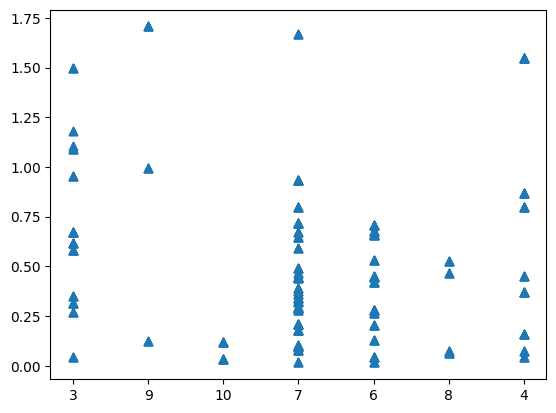

In [49]:
import matplotlib.pyplot as plt

x,y = q_results["band_list"] ,q_results["spatial_resolution"]
plt.scatter( x , y, marker= '^' )
#plt.xlabel( 'RA' )
#plt.ylabel( 'Dec' )
plt.show()

## Query by Target Name

In [51]:
query = f"""
            SELECT proposal_id, target_name, s_ra, s_dec, frequency,
                   spatial_resolution
            FROM ivoa.obscore
            WHERE UPPER(target_name) like UPPER('%HL%Tau%')
        """
q_results = service.search(query).to_table().to_pandas()
q_results

,proposal_id,target_name,s_ra,s_dec,frequency,spatial_resolution
0,2022.1.00825.S,HL_tau,67.910489,18.232641,261.996516,0.699331
1,2022.1.00825.S,HL_tau,67.910489,18.232641,262.057252,0.699331
...,...,...,...,...,...,...
310,2023.1.00515.S,HL_Tau,67.910210,18.232536,150.031264,0.292604
311,2023.1.00515.S,HL_Tau,67.910210,18.232536,151.989398,0.292604


## Query by ALMA Project Code
### ALMA Large Program DSHARP: 2016.1.00484.L

In [52]:
query = f"""
            SELECT proposal_id, target_name, s_ra, s_dec, frequency,
                   spatial_resolution
            FROM ivoa.obscore
            WHERE proposal_id like '2016.1.00484.L'
        """
q_results = service.search(query).to_table().to_pandas()
q_results

,proposal_id,target_name,s_ra,s_dec,frequency,spatial_resolution
0,2016.1.00484.L,J1733-1304,263.261274,-13.080430,232.592117,0.265025
1,2016.1.00484.L,J1733-1304,263.261274,-13.080430,244.979752,0.265025
...,...,...,...,...,...,...
538,2016.1.00484.L,J1427-4206,216.984573,-42.105399,246.903984,0.044837
539,2016.1.00484.L,J1427-4206,216.984573,-42.105399,230.536757,0.044837


## Query by all program from Cycle 5

In [ ]:
query = f"""
            SELECT proposal_id, target_name, s_ra, s_dec, frequency,
                   spatial_resolution
            FROM ivoa.obscore
            WHERE proposal_id like '...'
        """
q_results = service.search(query).to_table().to_pandas()
q_results

## Query by all program from Cycle 5
### Only full polarization data, angular resolution < 0.1 arcsec:

In [ ]:
query = f"""
            SELECT proposal_id, target_name, s_ra, s_dec, frequency,
                   spatial_resolution
            FROM ivoa.obscore
            WHERE proposal_id like '...'
            AND pol_states like '%/XX/XY/YX/YY/%'
            AND ...
        """

q_results = service.search(query).to_table().to_pandas()

We can print the proposal ids of our query:

In [ ]:
print(q_results['proposal_id'].unique())

## Query by frequency
#### Query all observations that have (a portion of) their spectral coverage overlapping the range [ 115.20 GHz , 115.35 GHz ]:

In [ ]:
query = f"""
            SELECT proposal_id, frequency, bandwidth
            FROM ivoa.obscore
            WHERE proposal_id like '%2016%'
            AND (frequency - 0.5 * bandwidth/1e9) < ...
            AND (frequency + 0.5 * bandwidth/1e9) > ...
        """
q_results = service.search(query).to_table().to_pandas()

#Half of the bandwith
half_bw = 0.5 * q_results['bandwidth']/ 1e9

#Compute min and max frequencies
q_results['min_freq'] = q_results['frequency'] - half_bw
q_results['max_freq'] = q_results['frequency'] + half_bw

In [ ]:
q_results[['proposal_id', 'min_freq', 'max_freq']]

## Query by Member OUS ID

Search by Member OUS ID in pyVo requires a different formatting:

In [ ]:
mous = 'uid://A001/X8c5/X96'
mous_formatted = mous.replace("___","://").replace("_","/")
# -> uid__A001_X8c5_X96

query = f"""
            SELECT *
            FROM ivoa.obscore
            WHERE member_ous_uid = '{mous_formatted}'
        """
q_results = service.search(query).to_table().to_pandas()
q_results

## Query by bibliography code

In [ ]:
query = f"""
            SELECT *
            FROM ivoa.obscore
            WHERE proposal_id like '%2016%'
            AND bib_reference like '%2017ApJ...851...55S%'
        """
q_results = service.search(query).to_table().to_pandas()
q_results

## Download data

Downloading data using pyVO is quite straightforward, even though it should be done mainly by **one OUS member at a time**, and it requires the different formatting seen before:  

In [ ]:
import os

mous = 'uid://A001/X8c5/X96'
mous_formatted = mous.replace("___", "://").replace("_", "/")

datalink = pyvo.dal.adhoc.DatalinkResults.from_result_url(
    f"https://almascience.eso.org/datalink/sync?ID={mous_formatted}")

# Uncomment next line to enable the download
#for dl in datalink:
    #dl.cachedataset(filename = os.path.basename(dl['access_url']))

You should now be able to see some tar files downloaded in your current working directory.

# Part 2.
# Astroquery<a name="astroquery"></a>

**Astroquery** is an astropy affiliated package that contains a collection of tools for querying astronomical web forms and databases.

Each web service has its own sub-package, ALMA included.


## Set-up

In [ ]:
import astroquery
print("astroquery version: {}".format(astroquery.__version__))

# Import astroquery and other useful packages:
from astroquery.alma import Alma
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord

#Instantiate alma object/class
alma = Alma()

If you have access to proprietary data, you will need to login to your ALMA account:

In [ ]:
#login_name = ""
#alma.login(login_name)

## Resources
- If you want to access help for a particular command, type `help(command)` and run the cell.
- The Astroquery readthedocs is located [here](https://astroquery.readthedocs.io/en/latest/).
- The output of astroquery searches are astropy tables (see [astropy tables documentation page](https://docs.astropy.org/en/stable/table/index.html) for more information on how to work with them).
- [ALMA Science Archive Notebooks](https://almascience.eso.org/alma-data/archive/archive-notebooks/nb8_ALMA_Query_using_astroquery.html).

## Query an object by name

We perform an ALMA object query (`alma.query_object`).
Astroquery sends the source name to the ALMA Archive, which then resolves the source coordinates using, i.e. Simbad, NED, and Vizier, for matches to the object name. Astroquery returns an astropy table containing information on all of the ALMA archival data towards the object coordinates.

The default ALMA search radius is 10 arcminutes.


In [ ]:
q_results = alma.query_object("...")
q_results.to_pandas()

## Query an object by coordinates

Note that you can instead perform a region search (`alma.query_region`).
There are multiple valid format for coordinates in astropy ( check the help page for [astropy.coordinates](https://docs.astropy.org/en/stable/coordinates/index.html) ).
#### Coordinates: 04h31m38.4s,18d13m57.2s

In [ ]:
coords = SkyCoord("...","...")
q_results = alma.query_region(coords, radius = 10 * u.arcmin)
q_results.to_pandas()

## Display the output query
### Display all the column names in the output query:

In [ ]:
q_results.colnames

### Display the unique Project code associated with the search results:

In [ ]:
from astropy.table import unique
q_results = unique(q_results, '...')
q_results['...'].data.data

## Query observations by Cycle, ALMA bands and sensitivity
#### HL Tau, Data from Band 3 and 4, starting from 2018, sensitivity for a velocity of 10 km/s be less than 10 mJy:

In [ ]:
from datetime import datetime

q_results = alma.query_object("...", payload = dict(
            ... = ...,
            ... = "..."))

q_results = q_results[[datetime.fromisoformat(i) > datetime(2018,1,1)
                       for i in q_results['obs_release_date']]]

q_results.to_pandas()

## Compare data
First perform a conesearch query (~1 degree) at the position of the COSMOS field centre ( **RA=10h00m24s**, **Dec=+02d10m55s** ) to the ALMA Science Archive:

In [ ]:
from astropy.coordinates import SkyCoord

cos_cen = SkyCoord("",frame = 'fk5')
c_results = Alma.query_region(cos_cen,radius = 0.5*u.deg)

# Keep only the unique observations
c_results = unique(c_results,'obs_id')

### Use astroquery to query the Herschel Science Archive:

In [ ]:
from astroquery.esa.hsa import HSA
h_results = HSA.query_region(cos_cen, radius = 0.5*u.deg)

### Find what column names are associated with the RA/Dec in the Herschel results:

In [ ]:
print(h_results.colnames)

### Cross-match the two catalogs:

In [ ]:
c_catalog = SkyCoord(ra= c_results['s_ra'],dec=c_results['s_dec'])
h_catalog = SkyCoord(ra= h_results['...'],dec=h_results['...'])
idx,d2d,d3d = h_catalog.match_to_catalog_sky(c_catalog)
print(idx,d2d)

In [ ]:
c_results[idx].to_pandas()

## Use source redshift to check which ALMA band covers line

We can query for observation which ALMA band encompasses a specific spectral line. Despite CenA relatively close proximity ($z<<1$), it's good practise to compute the redshifted frequency of the transitions of interest, to verify if they exactly align with the spectral configuration of the ALMA observations.

First, we query NED to grab the photometric redshift of AS 209:

In [ ]:
from astroquery.ipac.ned import Ned
z_result = Ned.query_object("...")
redshift = z_result['Redshift'][0]
print('AS 209 redshift = {}\n'.format(redshift))

### Use Splatalogue to get the rest frequencies of our transition of interest

#### CO v=0 lines from 1 to 1000 GHz:

In [ ]:
from astroquery.splatalogue import Splatalogue
from IPython.display import HTML

l_results = Splatalogue.query_lines(#minfreq,
                                    #maxfreq,
                                    chemical_name = ' CO v = 0 ',
                                   only_NRAO_recommended=True)

In [ ]:
# TEMPORARY BUG IN SPLATALOGUE!
# WE NEED TO FORMAT HTML THE TABLE TO SEE
# DIFFERENT COLORS IN THE TABLE!

HTML(l_results.to_pandas().to_html(escape=False, max_rows = 6))

### Convert rest frequencies of lines to redshifted values

In [ ]:
restfreq = l_results['orderedfreq']

shiftfreq = restfreq * u.MHz/ ( 1 + redshift )

print('\nSky frequencies of the first 6 CO v=0 J-transitions:\n')

for i in range(1,7):
    print('CO J={}-{}: {}'.format( i , i-1 , shiftfreq[i-1] ) )

## Query by redshifted CO lines

We can query alma data accoring to the presence of specific CO transitions within the frequency bands covered by those observations.
It is convenient to function **parse_frequency_support** from alma utils which converts the frequency_support column into arrays holding the spectral windows' start and end frequencies:

In [ ]:
from astroquery.alma.utils import parse_frequency_support
q_results = alma.query_object("HL Tau")

CO_loc = np.array([[any([a[0] < freq < a[1]
            # Check if the CO line falls
            # within the frequency support range
            for a in parse_frequency_support(q_row['frequency_support'])
            # for the specific spectral window
            if a[0] < q_row['frequency']* u.GHz < a[1]])
            # for all the observations
            for q_row in q_results]
            # for all the CO lines
            for freq in shiftfreq]).T


In [ ]:
CO_column = ['CO '+' '.join(l_results['resolved_QNs'][a])
          if any(a) else ' ' for a in CO_loc]

q_results = q_results.to_pandas()
q_results.insert(0,'CO data', CO_column)

#We keep only the observations that contains at least one CO line:

q_results = q_results[q_results['CO data'] != ' ']

In [ ]:
q_results

## Download ALMA data

Once you have decided which data you would like to work with locally, you can download it from the archive using the `access_url` provided in the astropy table. `alma.get_data_info` can be used to further list what is in each tarfile in the archive.

### List what is in the first two archives (to cut down on time):
Note: this may take some time.

In [ ]:
uid_url_tab_list = [alma.get_data_info(a, expand_tarfiles=True)
                    for a in q_results['member_ous_uid'][:2]]

### Make a list of only the FITS files and print the URLs:

In [ ]:
fits_urls = [[url for url in tab['access_url'] if '.fits' in url]
             for tab in uid_url_tab_list]
print(fits_urls)

### Set a local cache for the data and download:

In [ ]:
Alma.cache_location = '/big/external/drive/'

# Uncomment the lines below to start the download
#files = [alma.download_files(url,cache=True) for url in fits_urls]
#print(files)

## Use astroquery to send TAP queries (pyVO format)

### Query all observations with central frequencies between 300 and 400 GHz, sensitivity better than 0.5 mJy/beam @ 10 km/s, and science_keyword containing the word 'disk'

In [ ]:
tap_query = Alma.query_tap(f"""
                           """)

In [ ]:
tap_query.to_table().to_pandas()

# Part 3: ALminer<a name="alminer"></a>

ALminer is a Python-based code to effectively query, analyse, and visualize the ALMA Science Archive (ASA).

Leveraging pyVO, it simplifies ASA queries and user-friendly visualizations and refined filtering. Users can download ALMA data products or raw data for advanced image processing.

## Set-up

In [ ]:
import alminer

## Resources

- [ALminer documentation](https://alminer.readthedocs.io/en/latest/).
- The most recent version of the code can be found on [GitHub](https://github.com/emerge-erc/ALminer), with an [extensive tutorial Jupyter Notebook](https://nbviewer.org/github/emerge-erc/ALminer/blob/main/notebooks/tutorial/ALminer_tutorial.ipynb?flush_cache=True)
- Here is a list of all other possible [scientific categories](https://alminer.readthedocs.io/en/latest/pages/scientific_categories.html) and [keywords](https://alminer.readthedocs.io/en/latest/pages/science_keywords.html) for the `alminer.keysearch` function.


## Query by target name

The names must be known objects in SIMBAD, VizieR, or NED.

In [ ]:
q_results = alminer.target('')

## Display the query results as a table

ALminer output is already in a pandas format. With the  `alminer.explore` function, you can control whether or not you want to display all rows and/or all columns  By default, only the 18 most useful columns are shown and the number of rows is truncated.

We can use the option `head()` to visualize only the first 5 rows:

In [ ]:
alminer.explore(q_results, allcols=True, allrows=False).head()

##  Query by coordinates
#### **RA** = 67.910154, **Dec** = 	18.232681
#### **Search radius** of 10 arcmin

In [ ]:
q_results = alminer.conesearch(ra=..., dec=...,
                               search_radius = 10.0)

## Query by combination of features

* Scientific category 'Disks and planet formation"'
* Contain the words 'DSHARP' in their abstracts
* Public

In [ ]:
query_params = {'proposal_abstract': [''],
                'scientific_category':[""]}

In [ ]:
q_results = alminer.keysearch(query_params,
                              public = True,
                              print_targets = False)

## Summarize results

In [ ]:
alminer.summary(q_results)

## Filter results
### Get the description and units of *ang_res_arcsec* column:


In [ ]:
alminer.get_info('')

### Only keep observations with angular resolutions < 0.1 arcsec:

In [ ]:
selected = q_results[q_results['ang_res_arcsec'] < 0.1]
alminer.summary(selected, print_targets=False)

### Only keep observations with angular resolutions < 0.5 arcsec cointaing a certain frequency:

In [ ]:
freq = 230.5 #GHz
selected = selected[(selected["min_freq_GHz"] < freq) &
                        (selected["max_freq_GHz"] > freq)]
alminer.summary(selected, print_targets=False)

## Plot an overview of the query results

In [ ]:
alminer.plot_overview(q_results, showfig=True)

### Print all columns

In [ ]:
print(q_results.columns)

# Get information about the columns of interest
alminer.get_info('ang_res_arcsec')
alminer.get_info('vel_res_kms')

### Print the summary of an subquery
#### Angular Resolution < 3 arcsec, Velocity Resolution < 60 km/s

In [ ]:
sub_query = q_results[(q_results['ang_res_arcsec'] < ... ) &
                    (q_results['vel_res_kms'] < ...)]
alminer.summary(sub_query, print_targets=True)

### Plot the overview of the subquery

In [ ]:
alminer.plot_overview(sub_query) # you can also specify a redshift using the 'z' parameter (default=0)

## Query CO lines
### Search whether any CO lines are covered in the above observations:
Note that if you are interested in observations of targets at high-redshift, you can specify a redshift using the 'z' parameter.

In [ ]:
CO_obs = alminer.CO_lines(q_results, z=0)

### Mark redshifted CO lines:

In [ ]:
alminer.plot_overview(q_results, mark_CO=True)

### Search whether a given frequency is covered in the observations: 13CO 3-2

In [ ]:
myline_obs = alminer.line_coverage(q_results,
                                   line_freq=...,
                                   z=0,
                                   line_name="13CO 3-2",
                                   print_targets=True)

### Highlight this frequency in the overview plots:

In [ ]:
alminer.plot_line_overview(q_results, line_freq=...)

## Download all data products (raw + products)
### Download data whether the CO 3-2 frequency is covered in the observations:

In [ ]:
alminer.download_data(myline_obs, fitsonly=False, dryrun=True,
                      location='./data', print_urls=False)

### Download only continuum FITS images:

In [ ]:
alminer.download_data(myline_obs, fitsonly=True, dryrun=True,
                      location='./data', print_urls=True,
                      filename_must_include=['_sci', '.pbcor', 'cont'])

## Send a pyVO query using ALminer
We can use all the analysis and plotting routines presented before on these observations:

In [ ]:
query_str = f"""SELECT *
                 FROM ivoa.ObsCore
                 WHERE frequency > 300
                 AND frequency < 400
                 AND sensitivity_10kms < 5
                 AND science_keyword LIKE '%disk%'
            """

q_results = alminer.run_query(query_str)
q_results_obs = alminer.filter_results(q_results, print_targets=False)

<style>

.reveal .controls .controls-arrow::after, .reveal .controls .controls-arrow::before {
color: #5B5BD5;
}
    
.reveal .slides>section {
    overflow-y: auto !important; /* Abilita lo scrolling verticale */
    overflow-x: auto !important; /* Abilita lo scrolling orizzontale */
    word-wrap: normal !important; /* Disabilita il wrap delle parole */
}

.reveal {
    font-family: "Ubuntu", sans-serif;
    background-color: #ffffff;
}

.reveal table {
    font-size: 90%;
}

.jp-MarkdownOutput {
  padding-left: 0px;
    padding-right: 0px;
}

.jp-RenderedHTMLCommon > *:last-child {
  margin-bottom: 0.5em;
overflow-x: auto !important; */
}

.jp-RenderedHTMLCommon  {
    padding-right: 0px;
}

.jp-Collapser {
  flex: 0 0 0;
}
.reveal h1 {
    font-family: "Ubuntu", sans-serif;
    font-weight: 700;
    font-style: normal;
}


.reveal h2 {
    font-family: "Ubuntu", sans-serif;
    font-weight: 600;
    font-style: normal;
}

.reveal h3 {
    font-family: "Ubuntu", sans-serif;
    font-weight: 500;
    font-style: normal;z
}

.reveal h4 {
    font-family: "Ubuntu", sans-serif;
    font-weight: 400;
    font-style: normal;
}

.reveal p {
    font-family: "Ubuntu", sans-serif;
}

    
.reveal .slides>section .table-container {
    overflow-x: auto; /* Abilita lo scrolling orizzontale quando necessario */
 max-width: 0px;
 overflow: hidden;
 text-overflow: ellipsis;
 white-space: nowrap;
}
    
.reveal table {
    overflow-x: auto;/* Imposta la dimensione del font desiderata */
 max-width: 0px;
 overflow: hidden;
 text-overflow: ellipsis;
 white-space: nowrap;
}

.reveal .slides>section table {
     overflow-x: auto; /* Imposta la larghezza massima della tabella al 100% della slide */
 max-width: 0px;
 overflow: hidden;
 text-overflow: ellipsis;
 white-space: nowrap;
}

.reveal .slides>section .celltag_hide_input .jp-InputArea{
    display: none;
}
    
.reveal .slides>section:first-of-type .jp-InputPrompt{
    width: 0;
    padding-left: 0px;
    padding-right: 0px;
}

.reveal div.highlight > pre{
    word-wrap: normal;
    word-break: break-word;
}
    
.reveal .slides>section {
    overflow-y: auto; /* Enable vertical scrolling */
    overflow-x: auto; /* Enable horizontal scrolling */
    word-wrap: normal;
}

.reveal pre code {
    background-color: #f0f0f0; /* Aggiungi lo stesso colore di sfondo dei blocchi di codice */
    border-radius: 3px; /* Aggiungi bordi arrotondati */
    font-weight: bold; /* Rendi il testo in grassetto */
    color: #5B5BD5; /* Imposta il colore del testo */
    overflow-x: auto; /* Abilita lo scrolling orizzontale se necessario */
    overflow-y: auto; /* Abilita lo scrolling verticale se necessario */
    font-size: 15pt;
}

.reveal .slides>section .celltag_list pre{
    
   font-size: 13pt !important ;
    width: 100% !important;
    word-break: normal;
    white-space: preserve-spaces;
    
}
    
.reveal div.jp-OutputArea-output pre{
    
   font-size: 13pt !important ;
    width: 100% !important;
    word-break: normal;
    white-space: preserve-breaks;
    
}
.reveal p strong {
    color: #5B5BD5; /* Imposta il colore del testo in grassetto */
}

.reveal .slides>section .celltag_bold p strong {
    color: #000000; /* Imposta il colore del testo in grassetto */
}
.reveal .slides>section p code{
    background-color:  #f0f0f0  ; /* Light blue background */
    padding: 5px; /* Add padding for spacing */
    border-radius: 3px; /* Add rounded corners */
    font-weight: bold; /* Make text bold */
    color:#5B5BD5;
    overflow-x: auto;
    overflow-y: auto;
    word-wrap: normal;
}

.reveal ul,
.reveal li {
    font-family: "Ubuntu", sans-serif;
}

.reveal li code{
    background-color:  #f0f0f0  ; /* Light blue background */
    padding: 5px; /* Add padding for spacing */
    border-radius: 3px; /* Add rounded corners */
    font-weight: bold; /* Make text bold */
    color:#5B5BD5;
    overflow-x: auto;
    overflow-y: auto;
    word-wrap: normal;
}


.reveal a {
    color: #5B5BD5 !important; /* Imposta il colore del testo in grassetto e degli hyperlink */
}



/* Add background images */
.reveal .slides>section .celltag_first
    {
    background-image: url("https://europeanastrobiology.eu/wp-content/uploads/2024/07/EAI-logo-3-1-300x168-1.png");
    background-size: 36% auto;
    background-position-x: 0px,165px,410px,728px;
    background-repeat: no-repeat;
    background-position-y: 280px;
}
    

.reveal .slides>section:first-of-type h1,
.reveal .slides>section:first-of-type h2,
.reveal .slides>section:first-of-type p {
     margin-top: 50px;
    color: #5B5BD5;
    
}
    
.reveal .slides>section:first-of-type h3{
    font-weight: 400;
    padding-bottom: 50px;
    color: black;
    font-family:inherit;
    padding-right: 20px
}

.reveal .slides>section:first-of-type h4 {
    font-weight: 300;
    padding-bottom: 10px;
    color: black;
     text-align:right;
}

.reveal .slides>section:first-of-type p:last-of-type {
    margin-bottom: 0px; /* Adjust as needed */
}

.reveal .slides>section:first-of-type img {
    align-self: center;
    margin-top: auto;
}

.reveal .slides>section:first-of-type img {
    align-self: center;
    margin-top: auto;
    max-width: 100%; /* Adjust the percentage as needed */
    height: auto;
    padding-top: 50 px;
}


.reveal .slides>section .celltag_alminer {
    
    background-image: url('https://www.alma-allegro.nl/wp-content/uploads/2021/07/ALminer_logo_header-scaled-e1647277877367.jpg');
      position: relative;
      padding-top: 170px;
      background-repeat: no-repeat;
      background-position: top left;
      background-size: 80%;
      padding-left: 20px;
}
    
.reveal .slides>section .celltag_pyvo {
    
    background-image: url('https://projectescape.eu/sites/default/files/styles/responsive/public/IVOA_1_0.jpg?itok=D4U-uXrZ');
    position: relative;
    padding-top: 77px;
    background-repeat: no-repeat;
    background-position: top right;
    background-size: 50%;
    padding-left: 0px;
}
    
.reveal .slides>section .celltag_small_url p{
    font-size: 14pt !important ;
}

.reveal .slides>section .celltag_small_url {
    
    background-image: url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQShHA2uWsQsHlTk_9hKk-2TvOEVSa15TjBNlbREcInz95s1vMM_-CwrPHSGvR4L4lPba4&usqp=CAU');
    background-repeat: no-repeat;
    background-position: center right;
    background-size: 28% auto;
}
    
.reveal .slides>section .celltag_astroquery {
    
    background-image: url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRi8FeQzWKt6Kwt0DdcFBsCnimxHZULgwnQqqmNoocWKg&s');
    background-repeat: no-repeat;
    background-position: top right;
    background-size: 38% auto;
}

.reveal .slides>section:first-of-type {
    text-align:center;
    background-color: #ffffff ;
    
}
/* Fasce superiori e inferiori */
.reveal .slides>section:first-of-type::before,
.reveal .slides>section:first-of-type::after {
    content: '';
    position: absolute;
    width: 100%;
    height: 50px; /* Altezza della fascia */
    background-color: #5B5BD5; /* Colore azzurro */
    left: 0;
    z-index: -1; /* Per posizionare dietro al contenuto */
}

/* Fascia superiore */
.reveal .slides>section:first-of-type::before {
    top: 0;
}

/* Fascia inferiore */
.reveal .slides>section:first-of-type::after {
    bottom: 0;
}

img {
    width: auto;
    height: auto;
    max-width: 100%;
    max-height: 100%;
}


</style>

## Final Task: retrieve useful fits for the next steps

#### 1: hd142527, Band 3, 2018.1.00568.S, full Stokes
#### 2: hd142527, Band 7, 2015.1.00425.S, Stokes I, fits file should contain 'field5'


## PyVO Exercise:
Use PyVO to query the ALMA archive for observations of the protoplanetary disk surrounding HL Tauri that have a frequency range between 100 GHz and 120 GHz. Additionally, filter for observations with a minimum exposure time of 12000 seconds.

## Astropy Exercise:
Use Astroquery to query the ALMA archive for observations of the protoplanetary disk surrounding TW Hydra. The observations data should have been release after 2018, and an angular resolution between 0.1 arcseconds and 0.5 arcseconds. Also, its frequency coverage should contain the CO 2-1 emission line (230.538 GHz)

## Alminer Exercise
Use Alminer to query the ALMA archive for observations of the protoplanetary disk surrounding DM Tau. The observations should have an angular resolution lower than 0.1 arcseconds. Additionally, filter for ALma band 6, a largest angular scale bigger than 0.49 arcsec and sensitivity better than 0.44 mJy/beam @ 10 km/s.